## Curvefitting 1

- Ok shouldn't bee to bad to code up some basic sweeps right? Multiprocessing makes it a bit tricky, let me start with just single processing tho. 
- probably should do 5-10 different random initializations too...
- I want early/easy switching to higher dimensions too. 

In [98]:
random_seed=5
n_points=32
noise_level=0.2

In [99]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from IPython import display


# Your existing data generation code
all_x = np.linspace(-2, 2, 128)
all_y = 0.5 * (all_x-0)**2-1
all_y = 0.5*all_x**2

n_train_points=int(np.floor(n_points*0.5))
n_test_points=n_points-n_train_points
print(n_train_points, n_test_points)
                   
np.random.seed(random_seed) #2 is not bad, 5 is not bad
x=np.random.uniform(-2, 2, n_points)
y=0.5*x**2+noise_level*np.random.randn(n_points)
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

16 16


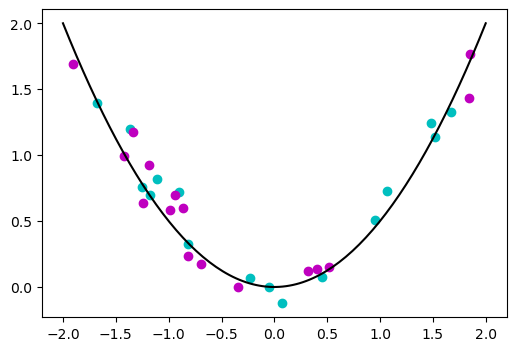

In [100]:
fig=plt.figure(0, (6, 4))
plt.plot(all_x, all_y, c='k')
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
# plt.ylim([-0.5, 2])

In [101]:
# Define 2-layer ReLU network
class TwoLayerNet(nn.Module):
    def __init__(self, hidden_size=20):
        super(TwoLayerNet, self).__init__()
        self.layer1 = nn.Linear(1, hidden_size)  # Input to hidden
        self.layer2 = nn.Linear(hidden_size, 1)  # Hidden to output
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x

In [102]:
# Convert data to PyTorch tensors
x_train_tensor = torch.FloatTensor(x_train).reshape(-1, 1)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
x_test_tensor = torch.FloatTensor(x_test).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

In [144]:
def train_that_shit(hidden_units=4, epochs=100000, lr=1e-2, seed=5, realtime_viz=False):
    # num_epochs=100000
    # lr=1e-2
    torch.manual_seed(seed)
    train_losses=[]
    test_losses=[]
    
    model = TwoLayerNet(hidden_units)
    criterion = nn.MSELoss()
    # optimizer = optim.SGD(model.parameters(), lr=lr)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(num_epochs):
        outputs = model(x_train_tensor)
        train_loss = criterion(outputs, y_train_tensor)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
    
        if (epoch + 1) % (num_epochs/5) == 0:
            with torch.no_grad():
                test_outputs = model(x_test_tensor)
                test_loss = criterion(test_outputs, y_test_tensor)
            train_losses.append(train_loss.item())
            test_losses.append(test_loss.item())
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
    
            
            with torch.no_grad():
                all_y_hat=model(torch.tensor(all_x).float().view(-1, 1))
            if realtime_viz or epoch==epochs-1:
                plt.clf()
                fig=plt.figure(0, (6, 4))
                plt.plot(all_x, all_y, c='k')
                plt.scatter(x_train, y_train, c='c')
                plt.scatter(x_test, y_test, c='m')
                plt.plot(all_x, all_y_hat.numpy(), c='c')
                # plt.ylim([-0.5, 2])        
                # display.clear_output(wait=True)
                # display.display(plt.gcf())
    return train_losses[-1], test_losses[-1]

Epoch [20000/100000], Train Loss: 0.0098, Test Loss: 0.0186
Epoch [40000/100000], Train Loss: 0.0083, Test Loss: 0.0220
Epoch [60000/100000], Train Loss: 0.0083, Test Loss: 0.0221
Epoch [80000/100000], Train Loss: 0.0083, Test Loss: 0.0222
Epoch [100000/100000], Train Loss: 0.0084, Test Loss: 0.0224


(0.008375819772481918, 0.022362610325217247)

<Figure size 640x480 with 0 Axes>

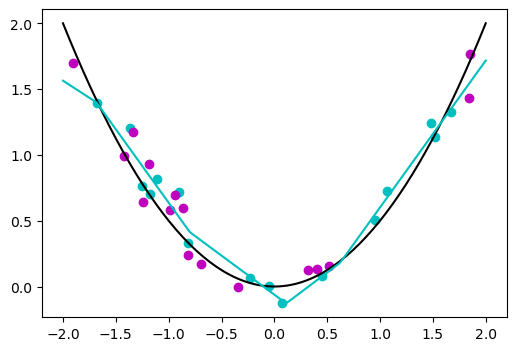

In [145]:
train_that_shit(hidden_units=4, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0083, Test Loss: 0.0205
Epoch [40000/100000], Train Loss: 0.0083, Test Loss: 0.0207
Epoch [60000/100000], Train Loss: 0.0083, Test Loss: 0.0205
Epoch [80000/100000], Train Loss: 0.0084, Test Loss: 0.0202
Epoch [100000/100000], Train Loss: 0.0083, Test Loss: 0.0201


(0.008333022706210613, 0.020096220076084137)

<Figure size 640x480 with 0 Axes>

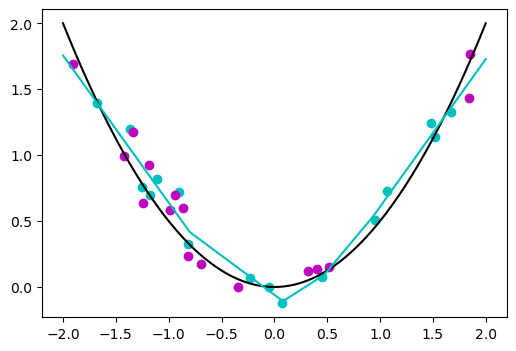

In [146]:
train_that_shit(hidden_units=5, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0083, Test Loss: 0.0203
Epoch [40000/100000], Train Loss: 0.0083, Test Loss: 0.0203
Epoch [60000/100000], Train Loss: 0.0082, Test Loss: 0.0192
Epoch [80000/100000], Train Loss: 0.0082, Test Loss: 0.0192
Epoch [100000/100000], Train Loss: 0.0082, Test Loss: 0.0192


(0.008226120844483376, 0.019197724759578705)

<Figure size 640x480 with 0 Axes>

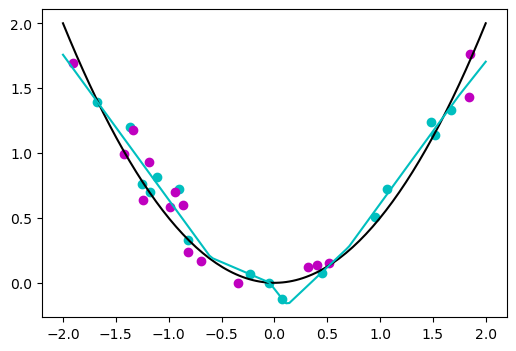

In [147]:
train_that_shit(hidden_units=6, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0077, Test Loss: 0.0237
Epoch [40000/100000], Train Loss: 0.0077, Test Loss: 0.0229
Epoch [60000/100000], Train Loss: 0.0077, Test Loss: 0.0223
Epoch [80000/100000], Train Loss: 0.0077, Test Loss: 0.0226
Epoch [100000/100000], Train Loss: 0.0077, Test Loss: 0.0237


(0.007689514197409153, 0.023729341104626656)

<Figure size 640x480 with 0 Axes>

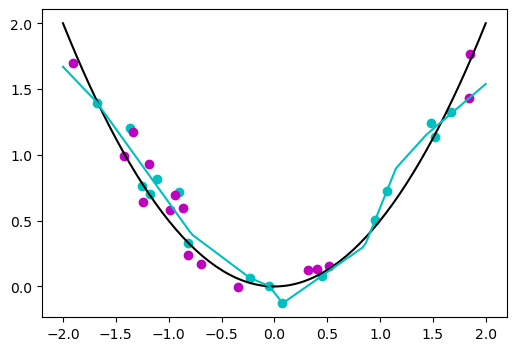

In [148]:
train_that_shit(hidden_units=8, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0079, Test Loss: 0.0207
Epoch [40000/100000], Train Loss: 0.0079, Test Loss: 0.0205
Epoch [60000/100000], Train Loss: 0.0011, Test Loss: 0.0441
Epoch [80000/100000], Train Loss: 0.0011, Test Loss: 0.0504
Epoch [100000/100000], Train Loss: 0.0011, Test Loss: 0.0507


(0.0010813090484589338, 0.05072123929858208)

<Figure size 640x480 with 0 Axes>

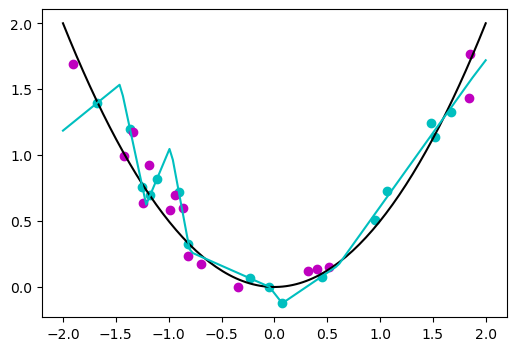

In [149]:
train_that_shit(hidden_units=10, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0082, Test Loss: 0.0185
Epoch [40000/100000], Train Loss: 0.0077, Test Loss: 0.0221
Epoch [60000/100000], Train Loss: 0.0077, Test Loss: 0.0223
Epoch [80000/100000], Train Loss: 0.0077, Test Loss: 0.0224
Epoch [100000/100000], Train Loss: 0.0077, Test Loss: 0.0227


(0.007708653807640076, 0.022663181647658348)

<Figure size 640x480 with 0 Axes>

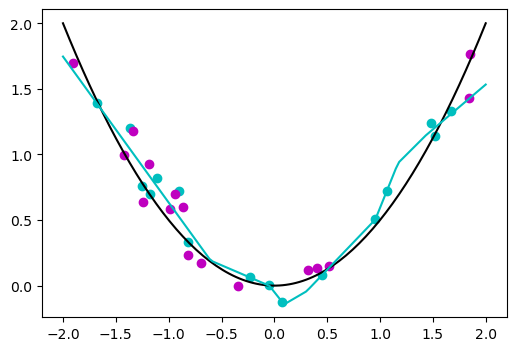

In [150]:
train_that_shit(hidden_units=12, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0073, Test Loss: 0.0239
Epoch [40000/100000], Train Loss: 0.0073, Test Loss: 0.0237
Epoch [60000/100000], Train Loss: 0.0073, Test Loss: 0.0239
Epoch [80000/100000], Train Loss: 0.0073, Test Loss: 0.0237
Epoch [100000/100000], Train Loss: 0.0073, Test Loss: 0.0237


(0.007266851142048836, 0.023701351135969162)

<Figure size 640x480 with 0 Axes>

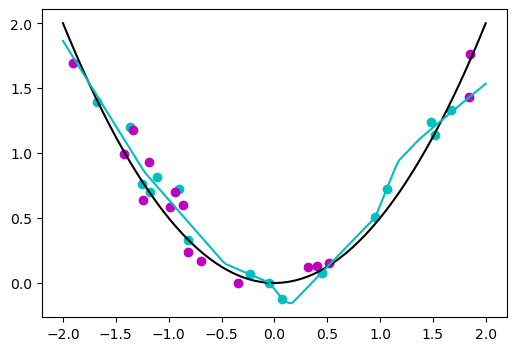

In [151]:
train_that_shit(hidden_units=14, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0050, Test Loss: 0.0278
Epoch [40000/100000], Train Loss: 0.0006, Test Loss: 0.0533
Epoch [60000/100000], Train Loss: 0.0006, Test Loss: 0.0547
Epoch [80000/100000], Train Loss: 0.0006, Test Loss: 0.0552
Epoch [100000/100000], Train Loss: 0.0006, Test Loss: 0.0557


(0.0006223786040209234, 0.05567014962434769)

<Figure size 640x480 with 0 Axes>

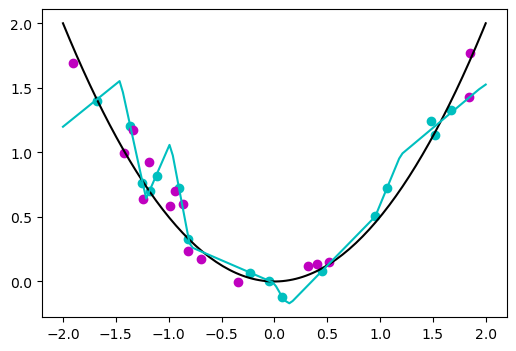

In [152]:
train_that_shit(hidden_units=15, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0007, Test Loss: 0.0513
Epoch [40000/100000], Train Loss: 0.0007, Test Loss: 0.0557
Epoch [60000/100000], Train Loss: 0.0007, Test Loss: 0.0555
Epoch [80000/100000], Train Loss: 0.0001, Test Loss: 0.0523
Epoch [100000/100000], Train Loss: 0.0001, Test Loss: 0.0526


(0.00010756478150142357, 0.052607230842113495)

<Figure size 640x480 with 0 Axes>

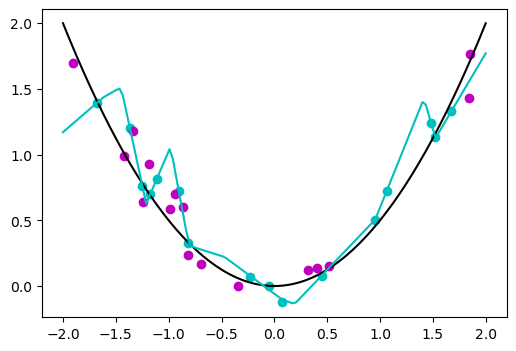

In [153]:
train_that_shit(hidden_units=16, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0074, Test Loss: 0.0200
Epoch [40000/100000], Train Loss: 0.0072, Test Loss: 0.0196
Epoch [60000/100000], Train Loss: 0.0071, Test Loss: 0.0193
Epoch [80000/100000], Train Loss: 0.0060, Test Loss: 0.0172
Epoch [100000/100000], Train Loss: 0.0060, Test Loss: 0.0173


(0.006034293211996555, 0.017257053405046463)

<Figure size 640x480 with 0 Axes>

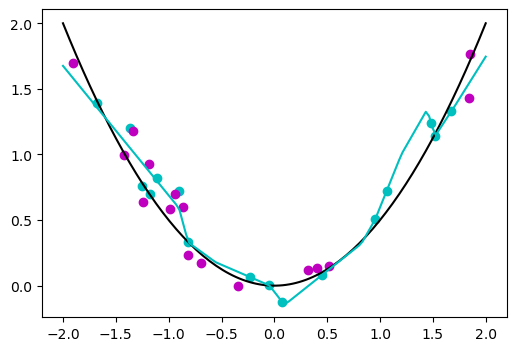

In [154]:
train_that_shit(hidden_units=18, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0037, Test Loss: 0.0282
Epoch [40000/100000], Train Loss: 0.0037, Test Loss: 0.0285
Epoch [60000/100000], Train Loss: 0.0037, Test Loss: 0.0277
Epoch [80000/100000], Train Loss: 0.0037, Test Loss: 0.0271
Epoch [100000/100000], Train Loss: 0.0037, Test Loss: 0.0264


(0.0036657839082181454, 0.026432037353515625)

<Figure size 640x480 with 0 Axes>

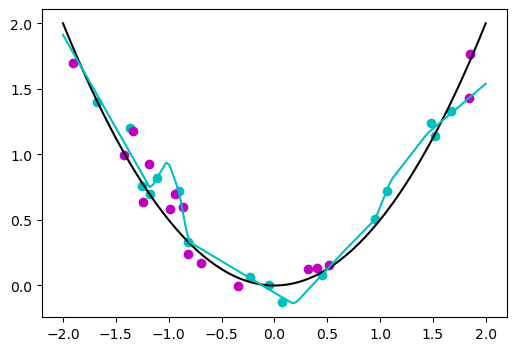

In [155]:
train_that_shit(hidden_units=20, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0011, Test Loss: 0.0226
Epoch [40000/100000], Train Loss: 0.0001, Test Loss: 0.0343
Epoch [60000/100000], Train Loss: 0.0001, Test Loss: 0.0600
Epoch [80000/100000], Train Loss: 0.0001, Test Loss: 0.0613
Epoch [100000/100000], Train Loss: 0.0000, Test Loss: 0.0600


(6.987167125771521e-06, 0.059994250535964966)

<Figure size 640x480 with 0 Axes>

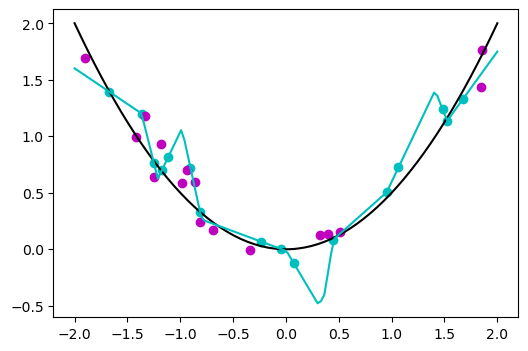

In [156]:
train_that_shit(hidden_units=22, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0007, Test Loss: 0.0371
Epoch [40000/100000], Train Loss: 0.0006, Test Loss: 0.0366
Epoch [60000/100000], Train Loss: 0.0003, Test Loss: 0.0442
Epoch [80000/100000], Train Loss: 0.0001, Test Loss: 0.0723
Epoch [100000/100000], Train Loss: 0.0001, Test Loss: 0.0882


(0.00010012371785705909, 0.0881534144282341)

<Figure size 640x480 with 0 Axes>

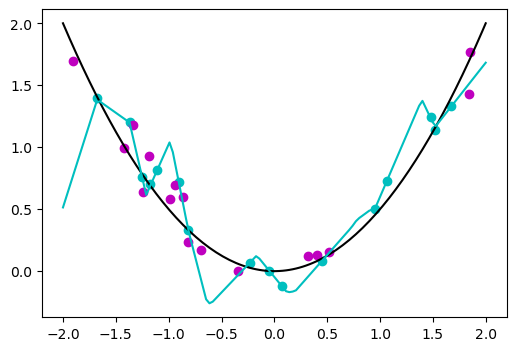

In [157]:
train_that_shit(hidden_units=32, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0003, Test Loss: 0.0329
Epoch [40000/100000], Train Loss: 0.0000, Test Loss: 0.0367
Epoch [60000/100000], Train Loss: 0.0000, Test Loss: 0.0342
Epoch [80000/100000], Train Loss: 0.0000, Test Loss: 0.0332
Epoch [100000/100000], Train Loss: 0.0000, Test Loss: 0.0332


(2.8330687200650573e-06, 0.03321157395839691)

<Figure size 640x480 with 0 Axes>

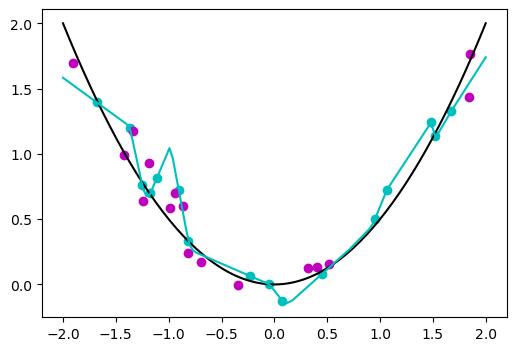

In [158]:
train_that_shit(hidden_units=64, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0003, Test Loss: 0.0329
Epoch [40000/100000], Train Loss: 0.0000, Test Loss: 0.0367
Epoch [60000/100000], Train Loss: 0.0000, Test Loss: 0.0342
Epoch [80000/100000], Train Loss: 0.0000, Test Loss: 0.0332
Epoch [100000/100000], Train Loss: 0.0000, Test Loss: 0.0332


(2.8330687200650573e-06, 0.03321157395839691)

<Figure size 640x480 with 0 Axes>

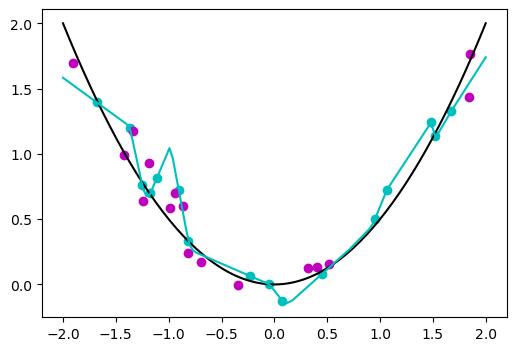

In [159]:
train_that_shit(hidden_units=64, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0000, Test Loss: 0.0263
Epoch [40000/100000], Train Loss: 0.0000, Test Loss: 0.0307
Epoch [60000/100000], Train Loss: 0.0000, Test Loss: 0.0321
Epoch [80000/100000], Train Loss: 0.0000, Test Loss: 0.0335
Epoch [100000/100000], Train Loss: 0.0005, Test Loss: 0.0362


(0.0004993148031644523, 0.03624768182635307)

<Figure size 640x480 with 0 Axes>

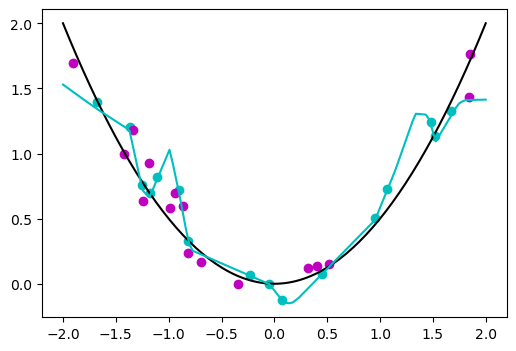

In [160]:
train_that_shit(hidden_units=128, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0005, Test Loss: 0.0351
Epoch [40000/100000], Train Loss: 0.0000, Test Loss: 0.0311
Epoch [60000/100000], Train Loss: 0.0000, Test Loss: 0.0311
Epoch [80000/100000], Train Loss: 0.0000, Test Loss: 0.0310
Epoch [100000/100000], Train Loss: 0.0000, Test Loss: 0.0310


(2.1548881790067753e-08, 0.031039124354720116)

<Figure size 640x480 with 0 Axes>

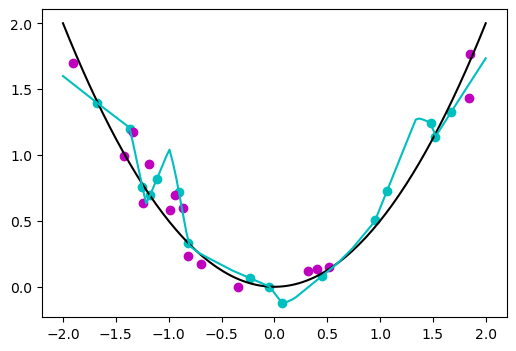

In [161]:
train_that_shit(hidden_units=128, epochs=100000, lr=1e-3, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0000, Test Loss: 0.0303
Epoch [40000/100000], Train Loss: 0.0000, Test Loss: 0.0317
Epoch [60000/100000], Train Loss: 0.0000, Test Loss: 0.0331
Epoch [80000/100000], Train Loss: 0.0000, Test Loss: 0.0336
Epoch [100000/100000], Train Loss: 0.0000, Test Loss: 0.0336


(1.0545452823862433e-05, 0.03355542942881584)

<Figure size 640x480 with 0 Axes>

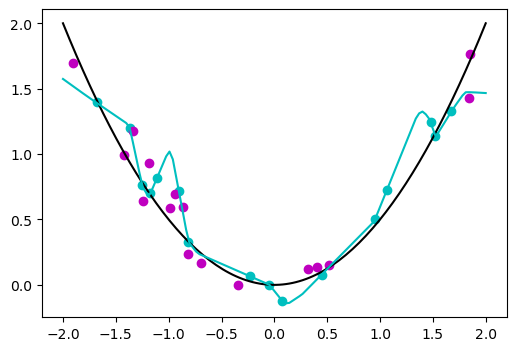

In [162]:
train_that_shit(hidden_units=256, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0005, Test Loss: 0.0313
Epoch [40000/100000], Train Loss: 0.0005, Test Loss: 0.0320
Epoch [60000/100000], Train Loss: 0.0004, Test Loss: 0.0337
Epoch [80000/100000], Train Loss: 0.0003, Test Loss: 0.0344
Epoch [100000/100000], Train Loss: 0.0002, Test Loss: 0.0315


(0.00015492811508011073, 0.03150196000933647)

<Figure size 640x480 with 0 Axes>

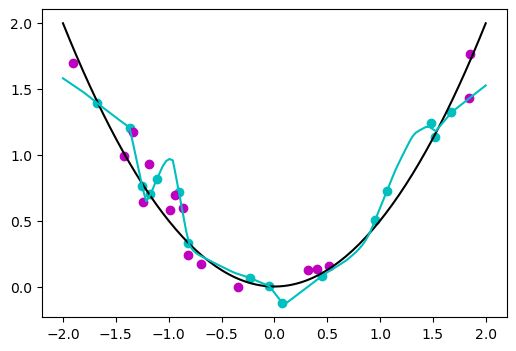

In [163]:
train_that_shit(hidden_units=256, epochs=100000, lr=1e-3, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0001, Test Loss: 0.0326
Epoch [40000/100000], Train Loss: 0.0003, Test Loss: 0.0324
Epoch [60000/100000], Train Loss: 0.0000, Test Loss: 0.0285
Epoch [80000/100000], Train Loss: 0.0000, Test Loss: 0.0291
Epoch [100000/100000], Train Loss: 0.0000, Test Loss: 0.0302


(2.184865024901228e-06, 0.030204392969608307)

<Figure size 640x480 with 0 Axes>

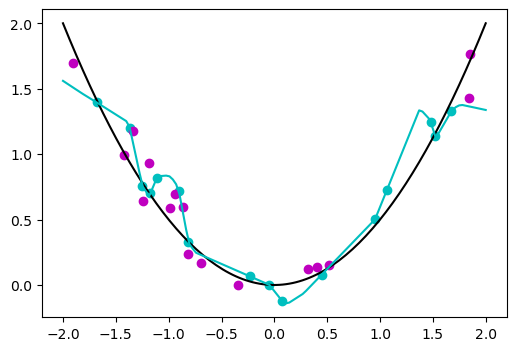

In [164]:
train_that_shit(hidden_units=512, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0005, Test Loss: 0.0325
Epoch [40000/100000], Train Loss: 0.0000, Test Loss: 0.0296
Epoch [60000/100000], Train Loss: 0.0000, Test Loss: 0.0294
Epoch [80000/100000], Train Loss: 0.0000, Test Loss: 0.0298
Epoch [100000/100000], Train Loss: 0.0000, Test Loss: 0.0297


(2.4675061993661984e-09, 0.029663201421499252)

<Figure size 640x480 with 0 Axes>

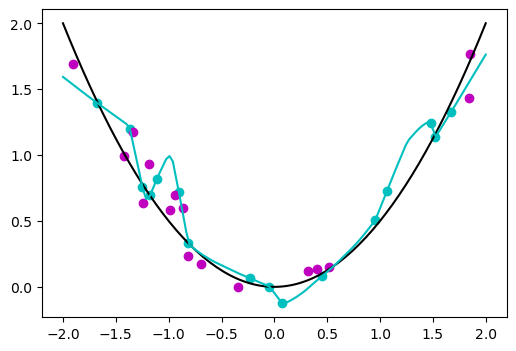

In [165]:
train_that_shit(hidden_units=512, epochs=100000, lr=1e-3, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0007, Test Loss: 0.0294
Epoch [40000/100000], Train Loss: 0.0001, Test Loss: 0.0308
Epoch [60000/100000], Train Loss: 0.0001, Test Loss: 0.0294
Epoch [80000/100000], Train Loss: 0.0000, Test Loss: 0.0284
Epoch [100000/100000], Train Loss: 0.0000, Test Loss: 0.0270


(6.36971662970609e-07, 0.027042195200920105)

<Figure size 640x480 with 0 Axes>

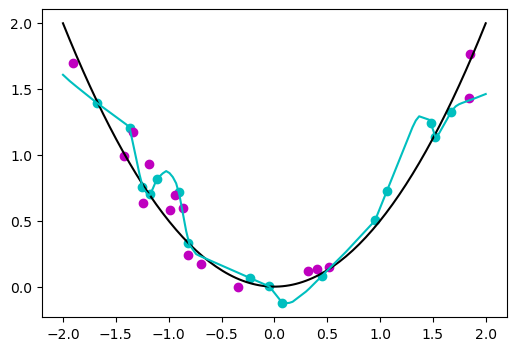

In [166]:
train_that_shit(hidden_units=1024, epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0003, Test Loss: 0.0313
Epoch [40000/100000], Train Loss: 0.0000, Test Loss: 0.0291
Epoch [60000/100000], Train Loss: 0.0000, Test Loss: 0.0296
Epoch [80000/100000], Train Loss: 0.0000, Test Loss: 0.0295
Epoch [100000/100000], Train Loss: 0.0000, Test Loss: 0.0296


(6.453878542700409e-10, 0.029635071754455566)

<Figure size 640x480 with 0 Axes>

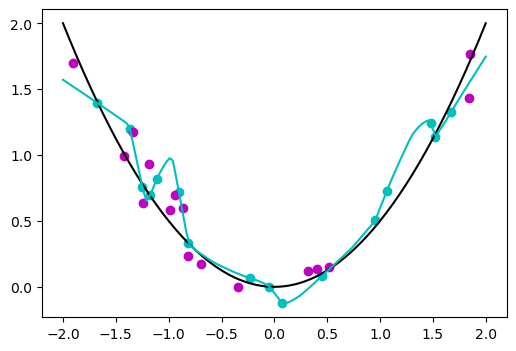

In [167]:
train_that_shit(hidden_units=1024, epochs=100000, lr=1e-3, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0000, Test Loss: 0.0267
Epoch [40000/100000], Train Loss: 0.0000, Test Loss: 0.0265
Epoch [60000/100000], Train Loss: 0.0000, Test Loss: 0.0266
Epoch [80000/100000], Train Loss: 0.0000, Test Loss: 0.0266
Epoch [100000/100000], Train Loss: 0.0000, Test Loss: 0.0268


(4.890391736012134e-08, 0.026795953512191772)

<Figure size 640x480 with 0 Axes>

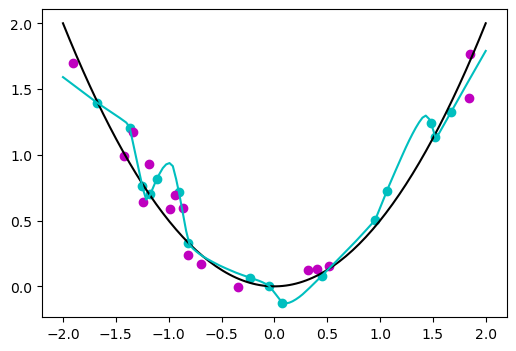

In [168]:
train_that_shit(hidden_units=3000, epochs=100000, lr=1e-3, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0000, Test Loss: 0.0265
Epoch [40000/100000], Train Loss: 0.0000, Test Loss: 0.0268
Epoch [60000/100000], Train Loss: 0.0063, Test Loss: 0.0358
Epoch [80000/100000], Train Loss: 0.0000, Test Loss: 0.0267
Epoch [100000/100000], Train Loss: 0.0000, Test Loss: 0.0268


(3.6593377217286616e-08, 0.026766518130898476)

<Figure size 640x480 with 0 Axes>

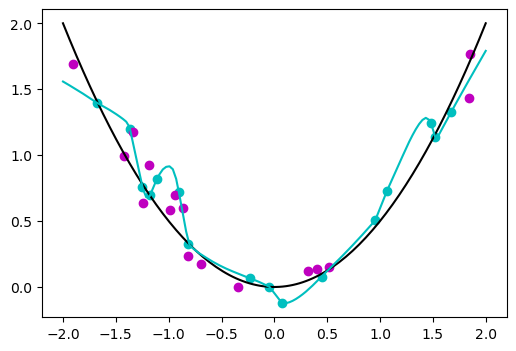

In [170]:
train_that_shit(hidden_units=5000, epochs=100000, lr=1e-3, seed=5, realtime_viz=False)

hmm maybe some kidna sinusoidal example would be more telling?

----

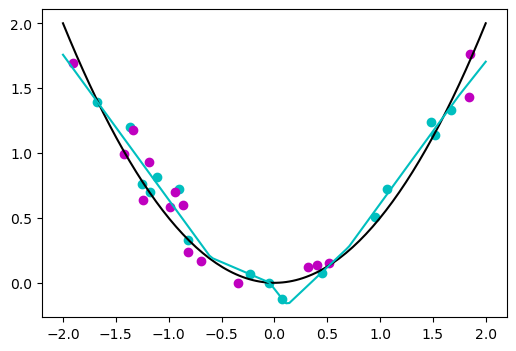

<Figure size 640x480 with 0 Axes>

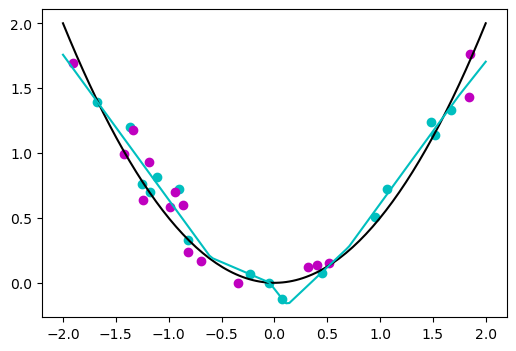

In [131]:
num_epochs=100000
lr=1e-2
torch.manual_seed(5)
train_losses=[]
test_losses=[]

model = TwoLayerNet(6)
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    outputs = model(x_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch + 1) % (num_epochs/10) == 0:
        with torch.no_grad():
            test_outputs = model(x_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        
        with torch.no_grad():
            all_y_hat=model(torch.tensor(all_x).float().view(-1, 1))

        plt.clf()
        fig=plt.figure(0, (6, 4))
        plt.plot(all_x, all_y, c='k')
        plt.scatter(x_train, y_train, c='c')
        plt.scatter(x_test, y_test, c='m')
        plt.plot(all_x, all_y_hat.numpy(), c='c')
        # plt.ylim([-0.5, 2])        
        display.clear_output(wait=True)
        display.display(plt.gcf())

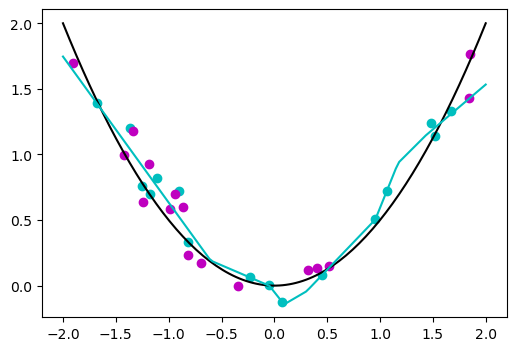

<Figure size 640x480 with 0 Axes>

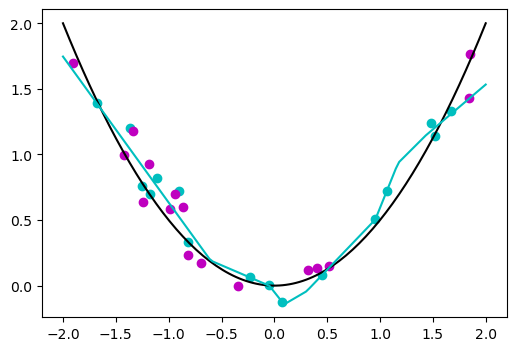

In [130]:
num_epochs=100000
lr=1e-2
torch.manual_seed(5)
train_losses=[]
test_losses=[]

model = TwoLayerNet(12)
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    outputs = model(x_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch + 1) % (num_epochs/10) == 0:
        with torch.no_grad():
            test_outputs = model(x_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        
        with torch.no_grad():
            all_y_hat=model(torch.tensor(all_x).float().view(-1, 1))

        plt.clf()
        fig=plt.figure(0, (6, 4))
        plt.plot(all_x, all_y, c='k')
        plt.scatter(x_train, y_train, c='c')
        plt.scatter(x_test, y_test, c='m')
        plt.plot(all_x, all_y_hat.numpy(), c='c')
        # plt.ylim([-0.5, 2])        
        display.clear_output(wait=True)
        display.display(plt.gcf())

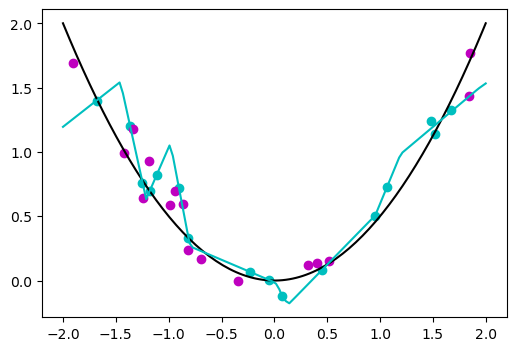

<Figure size 640x480 with 0 Axes>

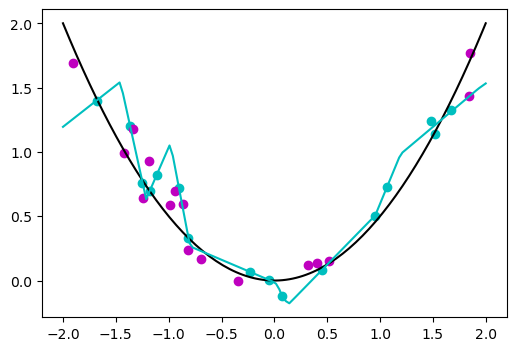

In [125]:
num_epochs=60000
lr=1e-2
torch.manual_seed(5)
train_losses=[]
test_losses=[]

model = TwoLayerNet(15)
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    outputs = model(x_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch + 1) % (num_epochs/10) == 0:
        with torch.no_grad():
            test_outputs = model(x_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        
        with torch.no_grad():
            all_y_hat=model(torch.tensor(all_x).float().view(-1, 1))

        plt.clf()
        fig=plt.figure(0, (6, 4))
        plt.plot(all_x, all_y, c='k')
        plt.scatter(x_train, y_train, c='c')
        plt.scatter(x_test, y_test, c='m')
        plt.plot(all_x, all_y_hat.numpy(), c='c')
        # plt.ylim([-0.5, 2])        
        display.clear_output(wait=True)
        display.display(plt.gcf())

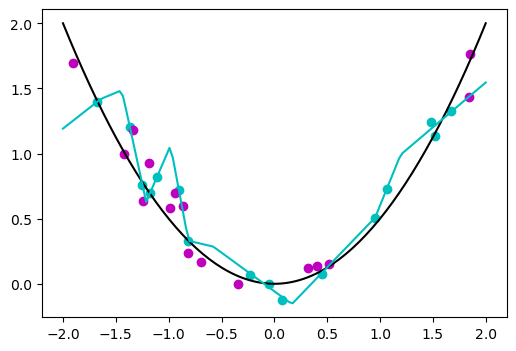

<Figure size 640x480 with 0 Axes>

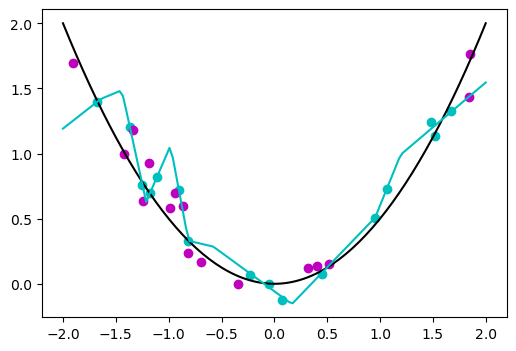

In [127]:
num_epochs=60000
lr=1e-2
torch.manual_seed(5)
train_losses=[]
test_losses=[]

model = TwoLayerNet(16)
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    outputs = model(x_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch + 1) % (num_epochs/10) == 0:
        with torch.no_grad():
            test_outputs = model(x_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        
        with torch.no_grad():
            all_y_hat=model(torch.tensor(all_x).float().view(-1, 1))

        plt.clf()
        fig=plt.figure(0, (6, 4))
        plt.plot(all_x, all_y, c='k')
        plt.scatter(x_train, y_train, c='c')
        plt.scatter(x_test, y_test, c='m')
        plt.plot(all_x, all_y_hat.numpy(), c='c')
        # plt.ylim([-0.5, 2])        
        display.clear_output(wait=True)
        display.display(plt.gcf())

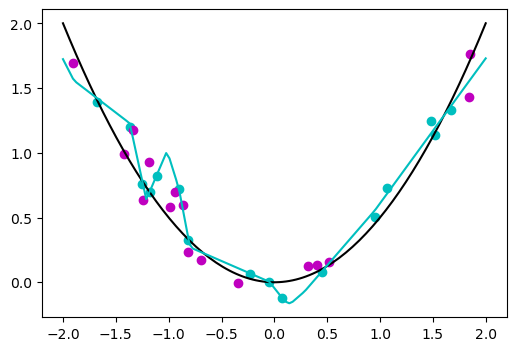

<Figure size 640x480 with 0 Axes>

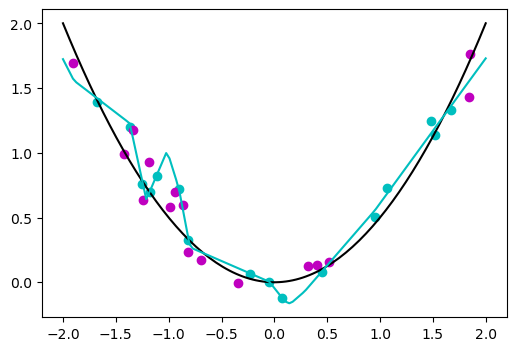

In [128]:
num_epochs=60000
lr=1e-2
torch.manual_seed(5)
train_losses=[]
test_losses=[]

model = TwoLayerNet(17)
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    outputs = model(x_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch + 1) % (num_epochs/10) == 0:
        with torch.no_grad():
            test_outputs = model(x_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        
        with torch.no_grad():
            all_y_hat=model(torch.tensor(all_x).float().view(-1, 1))

        plt.clf()
        fig=plt.figure(0, (6, 4))
        plt.plot(all_x, all_y, c='k')
        plt.scatter(x_train, y_train, c='c')
        plt.scatter(x_test, y_test, c='m')
        plt.plot(all_x, all_y_hat.numpy(), c='c')
        # plt.ylim([-0.5, 2])        
        display.clear_output(wait=True)
        display.display(plt.gcf())

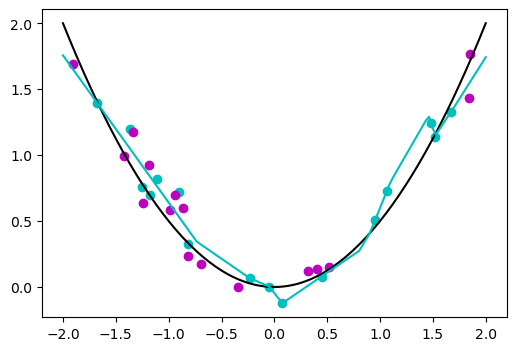

<Figure size 640x480 with 0 Axes>

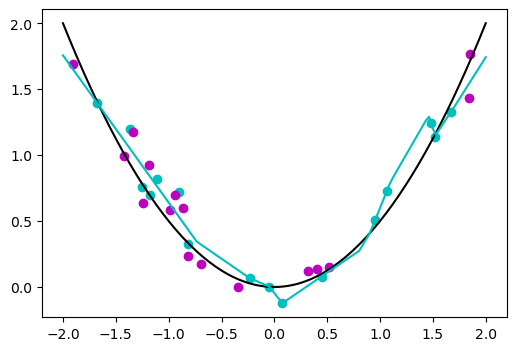

In [129]:
num_epochs=60000
lr=1e-2
torch.manual_seed(5)
train_losses=[]
test_losses=[]

model = TwoLayerNet(18)
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    outputs = model(x_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch + 1) % (num_epochs/10) == 0:
        with torch.no_grad():
            test_outputs = model(x_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        
        with torch.no_grad():
            all_y_hat=model(torch.tensor(all_x).float().view(-1, 1))

        plt.clf()
        fig=plt.figure(0, (6, 4))
        plt.plot(all_x, all_y, c='k')
        plt.scatter(x_train, y_train, c='c')
        plt.scatter(x_test, y_test, c='m')
        plt.plot(all_x, all_y_hat.numpy(), c='c')
        # plt.ylim([-0.5, 2])        
        display.clear_output(wait=True)
        display.display(plt.gcf())

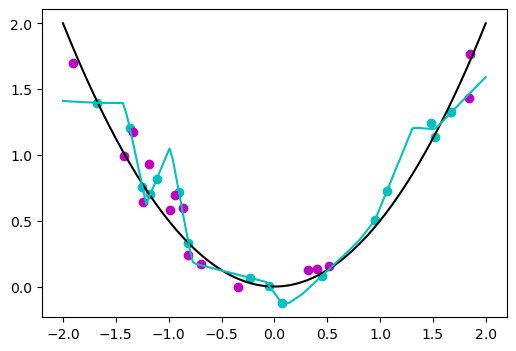

<Figure size 640x480 with 0 Axes>

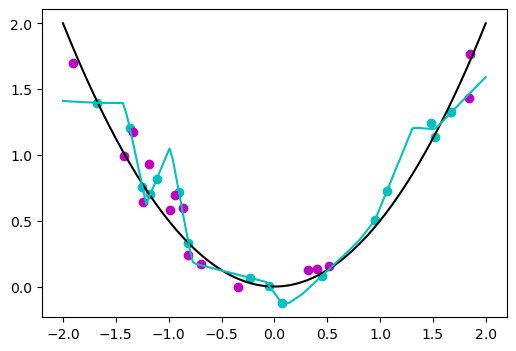

In [118]:
num_epochs=60000
lr=1e-2
torch.manual_seed(5)
train_losses=[]
test_losses=[]

model = TwoLayerNet(32)
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    outputs = model(x_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch + 1) % (num_epochs/10) == 0:
        with torch.no_grad():
            test_outputs = model(x_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        
        with torch.no_grad():
            all_y_hat=model(torch.tensor(all_x).float().view(-1, 1))

        plt.clf()
        fig=plt.figure(0, (6, 4))
        plt.plot(all_x, all_y, c='k')
        plt.scatter(x_train, y_train, c='c')
        plt.scatter(x_test, y_test, c='m')
        plt.plot(all_x, all_y_hat.numpy(), c='c')
        # plt.ylim([-0.5, 2])        
        display.clear_output(wait=True)
        display.display(plt.gcf())

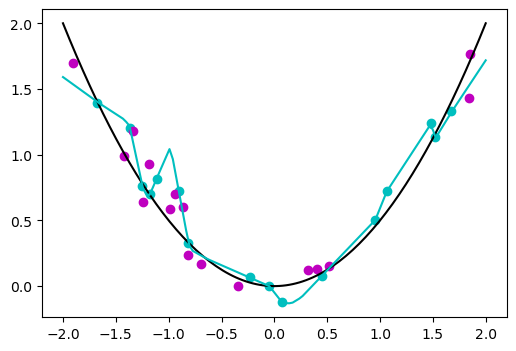

<Figure size 640x480 with 0 Axes>

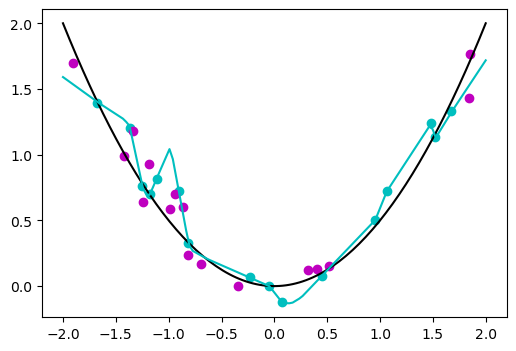

In [120]:
num_epochs=60000
lr=1e-2
torch.manual_seed(5)
train_losses=[]
test_losses=[]

model = TwoLayerNet(64)
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    outputs = model(x_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch + 1) % (num_epochs/10) == 0:
        with torch.no_grad():
            test_outputs = model(x_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        
        with torch.no_grad():
            all_y_hat=model(torch.tensor(all_x).float().view(-1, 1))

        plt.clf()
        fig=plt.figure(0, (6, 4))
        plt.plot(all_x, all_y, c='k')
        plt.scatter(x_train, y_train, c='c')
        plt.scatter(x_test, y_test, c='m')
        plt.plot(all_x, all_y_hat.numpy(), c='c')
        # plt.ylim([-0.5, 2])        
        display.clear_output(wait=True)
        display.display(plt.gcf())

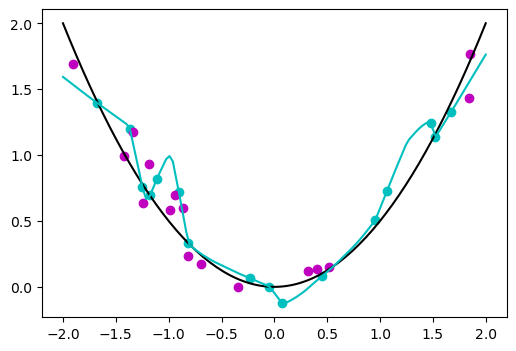

<Figure size 640x480 with 0 Axes>

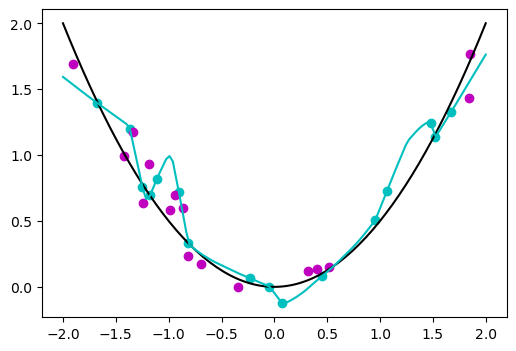

In [124]:
num_epochs=100000
lr=1e-3
torch.manual_seed(5)
train_losses=[]
test_losses=[]

model = TwoLayerNet(512)
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    outputs = model(x_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch + 1) % (num_epochs/10) == 0:
        with torch.no_grad():
            test_outputs = model(x_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        
        with torch.no_grad():
            all_y_hat=model(torch.tensor(all_x).float().view(-1, 1))

        plt.clf()
        fig=plt.figure(0, (6, 4))
        plt.plot(all_x, all_y, c='k')
        plt.scatter(x_train, y_train, c='c')
        plt.scatter(x_test, y_test, c='m')
        plt.plot(all_x, all_y_hat.numpy(), c='c')
        # plt.ylim([-0.5, 2])        
        display.clear_output(wait=True)
        display.display(plt.gcf())